<a href="https://colab.research.google.com/github/sarankumar1325/TRS_RETAIL_SALES_ANALYSIS-/blob/main/RETAIL_SALES_ANALYSIS_TRS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing  Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Loading and Exploration:**

In [ ]:
df = pd.read_csv('/content/customer_shopping_data.csv')

In [ ]:
# Display the first few rows of the dataset
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
# Display summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


# **Data Cleaning and Transformation:**

In [ ]:
# Convert 'invoice_date' to datetime format                                   #
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

# Extract month and year from 'invoice_date'
df['month'] = df['invoice_date'].dt.month
df['year'] = df['invoice_date'].dt.year

# **Exploratory Data Analysis:**

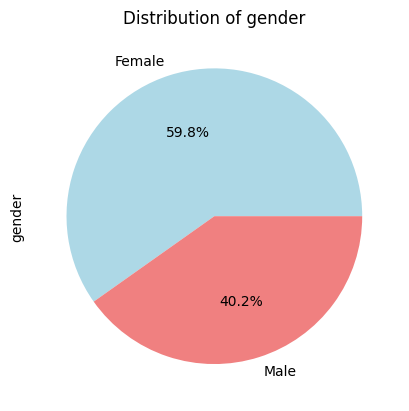

In [ ]:
# Explore gender distribution with custom colors
colors = ['lightblue', 'lightcoral']  # Example colors, you can customize as needed

gender_counts = df['gender'].value_counts()
gender_counts.plot.pie(autopct='%.1f%%', colors=colors)
plt.title('Distribution of gender')
plt.show()

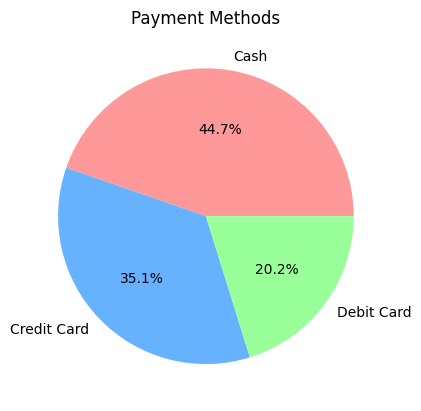

In [ ]:
# Explore payment method preferences
payment = df['payment_method'].value_counts().reset_index(name='count')

# Specify colors for the pie chart
colors = ['#FF9999', '#66B2FF', '#99FF99']

plt.pie(x=payment['count'], labels=payment['index'], autopct='%.1f%%', colors=colors)
plt.title('Payment Methods')
plt.show()


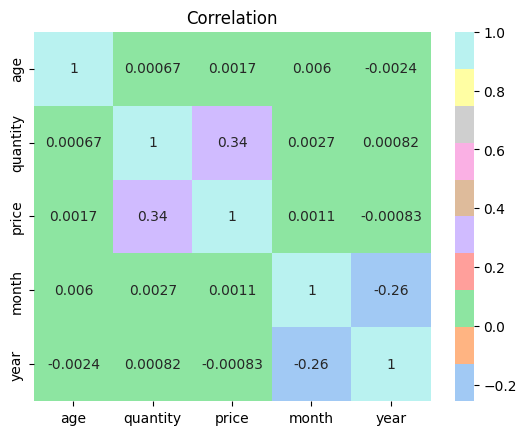

In [ ]:
import seaborn as sns

# Correlation heatmap with custom colors
custom_colors = sns.color_palette("pastel")  # You can replace "pastel" with any other seaborn color palette or provide a list of custom colors

sns.heatmap(data=df.select_dtypes(include='number').corr(), annot=True, cmap=custom_colors)
plt.title('Correlation')
plt.show()

In this section explores the distribution of gender and payment method preferences. Additionally, we visualize the correlation heatmap to identify relationships between numerical features.

**Gender Distribution Over Years:**

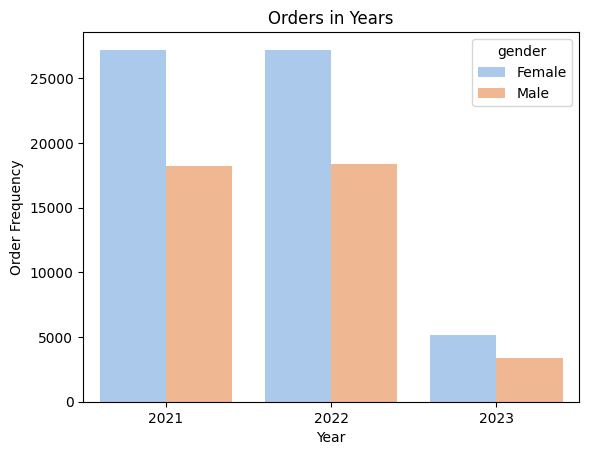

In [ ]:
# Analyze gender distribution over years
year = df.groupby(['year', 'gender'])['year'].count().reset_index(name='count')
sns.barplot(data=year, x='year', y='count', hue='gender', palette='pastel')
plt.xlabel('Year')
plt.ylabel('Order Frequency')
plt.title('Orders in Years')
plt.show()

**Monthly Order Frequency:**

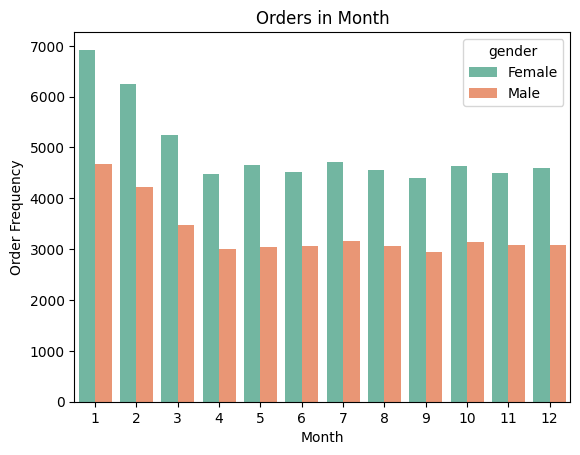

In [ ]:
# Analyze monthly order frequency
month = df.groupby(['month', 'gender'])['month'].count().reset_index(name='count')
sns.barplot(data=month, x='month', y='count', hue='gender', palette='Set2')
plt.xlabel('Month')
plt.ylabel('Order Frequency')
plt.title('Orders in Month')
plt.show()

**Payment Method Preferences by Gender:**

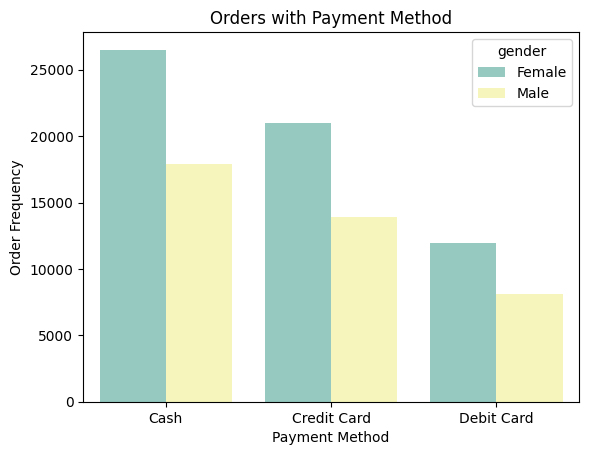

In [ ]:
# Analyze payment method preferences by gender
payment_gender = df.groupby(['payment_method', 'gender']).size().reset_index(name='count')
sns.barplot(data=payment_gender, x='payment_method', y='count', hue='gender', palette='Set3')
plt.xlabel('Payment Method')
plt.ylabel('Order Frequency')
plt.title('Orders with Payment Method')
plt.show()

**Age Distribution:**

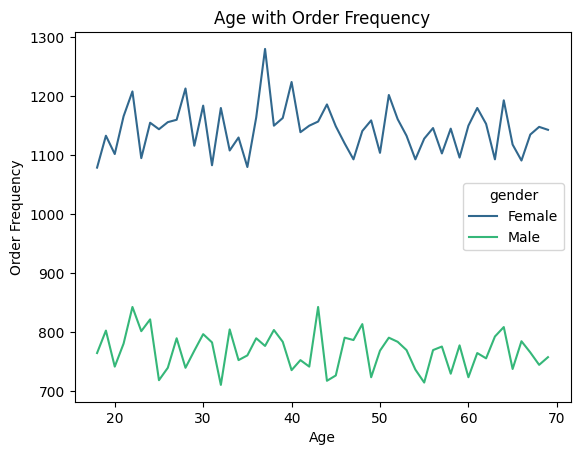

In [ ]:
# Analyze age distribution
age = df.groupby(['age', 'gender']).size().reset_index(name='count')
sns.lineplot(data=age, x='age', y='count', hue='gender', palette='viridis')
plt.title('Age with Order Frequency')
plt.xlabel('Age')
plt.ylabel('Order Frequency')
plt.show()

**Category Preferences by Gender:**

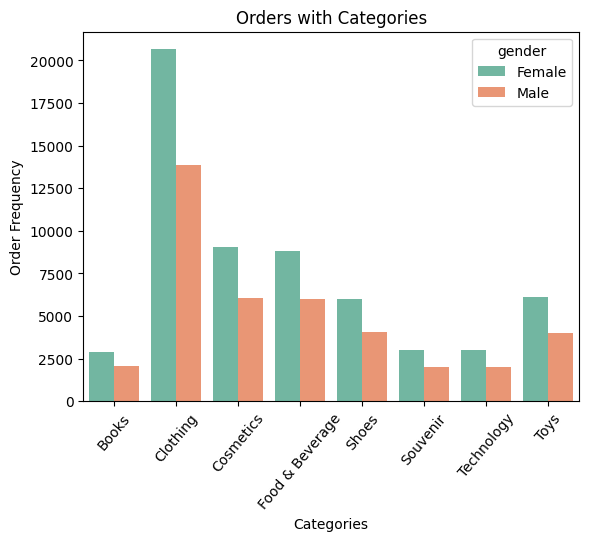

In [ ]:
# Analyze category preferences by gender
category = df.groupby(['category', 'gender']).size().reset_index(name='count')
sns.barplot(data=category, x='category', y='count', hue='gender', palette='Set2')
plt.xlabel('Categories')
plt.ylabel('Order Frequency')
plt.title('Orders with Categories')
plt.xticks(rotation=50)
plt.show()


**Quantity and Income Analysis:**

In [ ]:
# Analyze quantity and income over time
quantity_year = df.groupby(['year', 'month'])['quantity'].sum().reset_index()
income = df.groupby(['year', 'month'])['price'].sum().reset_index()


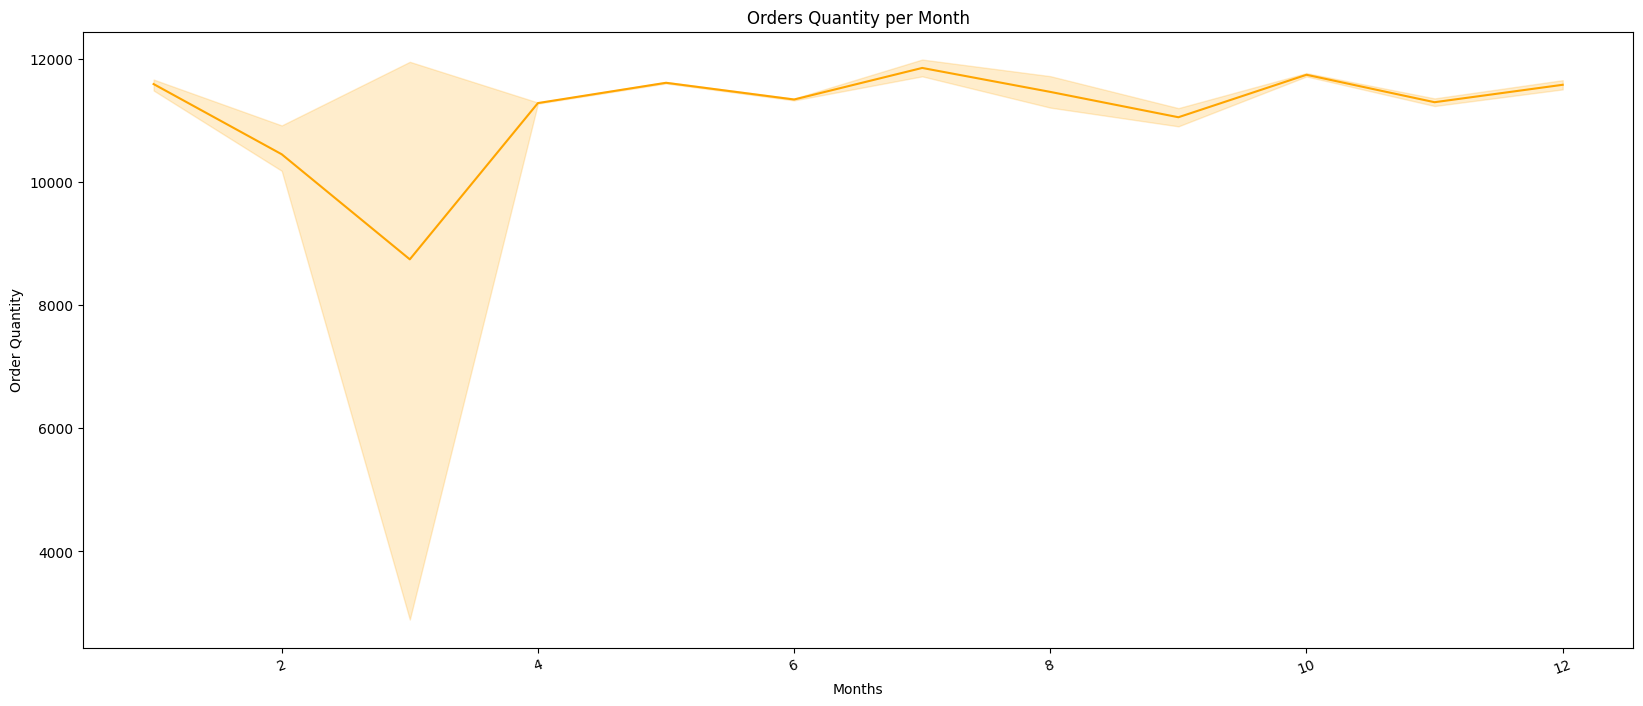

In [ ]:
# Visualize quantity per month
plt.figure(figsize=(20, 8))
sns.lineplot(data=quantity_year, x='month', y='quantity', color='orange')
plt.title('Orders Quantity per Month')
plt.xlabel('Months')
plt.ylabel('Order Quantity')
plt.xticks(rotation=20)
plt.show()

<ipython-input-32-c34b0e851e52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income, x='month', y='price', palette='viridis')  # You can replace 'viridis' with any other valid Seaborn palette


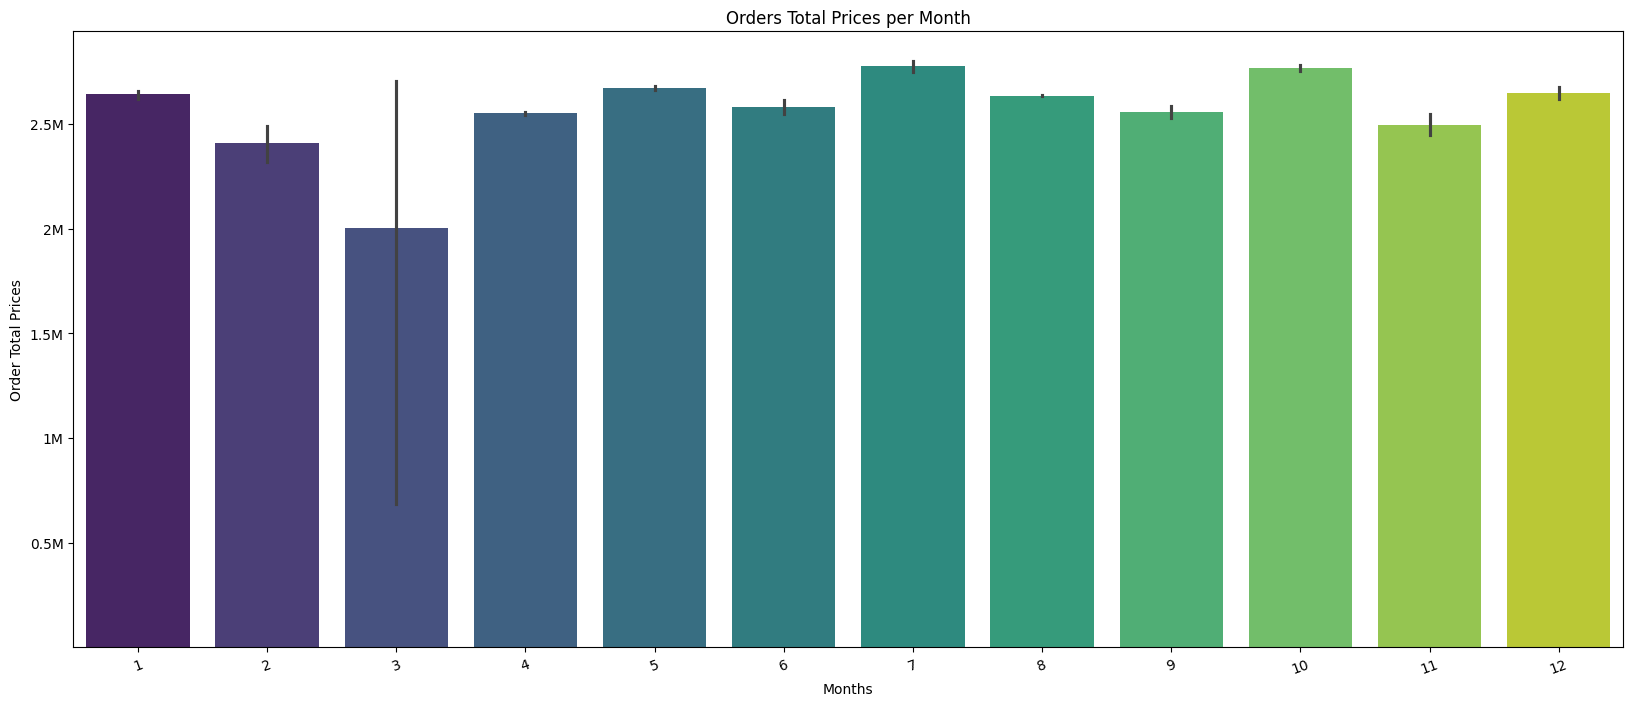

In [ ]:
# Visualize income per month with a custom color palette
plt.figure(figsize=(20, 8))
sns.barplot(data=income, x='month', y='price', palette='viridis')  # You can replace 'viridis' with any other valid Seaborn palette
ytick = [500000, 1000000, 1500000, 2000000, 2500000]
ylabels = ['0.5M', '1M', '1.5M', '2M', '2.5M']
plt.yticks(ytick, ylabels)
plt.title('Orders Total Prices per Month')
plt.xlabel('Months')
plt.ylabel('Order Total Prices')
plt.xticks(rotation=20)
plt.show()


**Age vs. Price and Quantity vs. Price:**

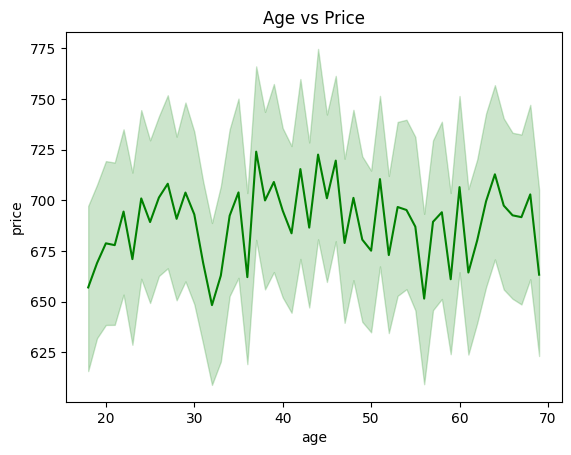

In [ ]:
# Visualize age vs price with a different color (e.g., 'green')
sns.lineplot(data=df, x='age', y='price', color='green')
plt.title('Age vs Price')
plt.show()

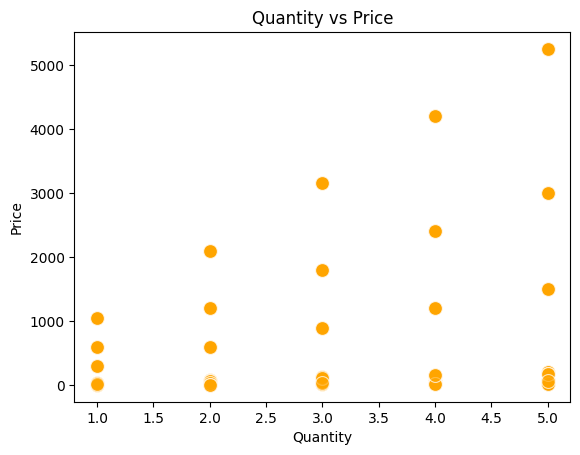

In [ ]:
# Visualize quantity vs price
sns.scatterplot(data=df, x='quantity', y='price', color='orange', marker='o', s=100, alpha=0.7)
plt.title('Quantity vs Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()


**Shopping Mall Preferences:**

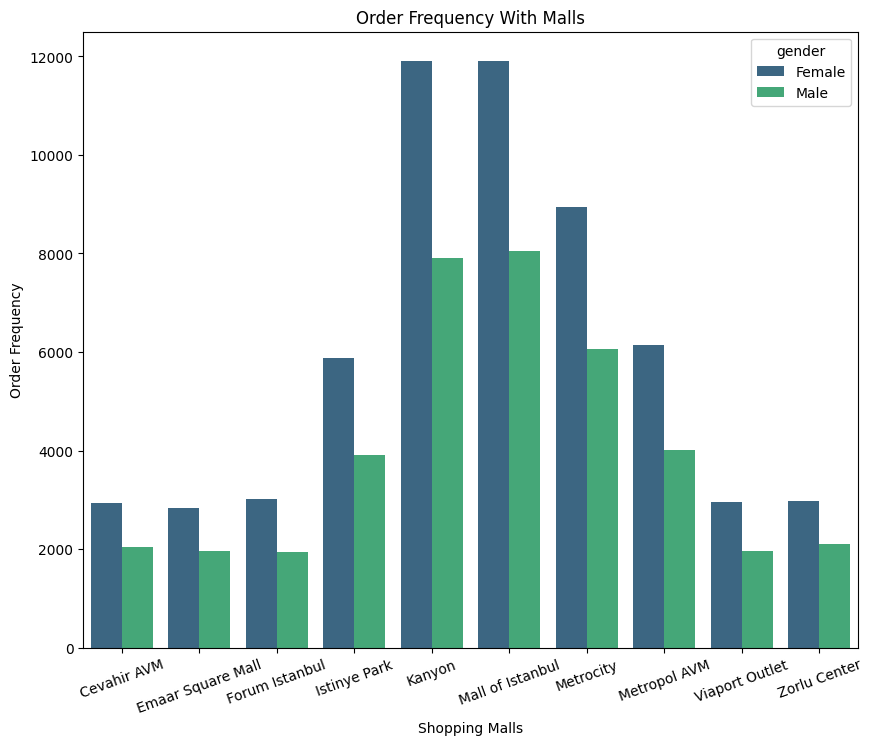

In [ ]:
# Analyze shopping mall preferences by gender
mall = df.groupby(['shopping_mall', 'gender']).size().reset_index(name='count')
plt.figure(figsize=(10, 8))
sns.barplot(data=mall, x='shopping_mall', y='count', hue='gender', palette='viridis')
plt.xlabel('Shopping Malls')
plt.ylabel('Order Frequency')
plt.xticks(rotation=20)
plt.title('Order Frequency With Malls')
plt.show()

# ***Insights:***

***Gender Distribution:***

 The dataset reveals a predominant female customer base (approximately 60%).
 Targeted marketing efforts should be designed to cater specifically to the preferences and needs of the significant female demographic.

***Payment Method Preferences:***

 Cash transactions hold a substantial share, with credit and debit cards following.
Client Message: Encourage the adoption of digital payment options or incentivize credit/debit card usage through loyalty programs to potentially reduce cash-handling costs.

***Age and Order Frequency:***

Diverse age distribution with a concentration in the 30-40 age range; consistent order frequency across age groups.
 Crafting marketing campaigns and product offerings tailored to the 30-40 age group could yield positive results due to their significant representation.

***Category Preferences:***

 Clothing is the top category for both genders, followed by cosmetics and shoes.
Optimize inventory and promotional strategies for clothing, cosmetics, and shoes, given their strong performance.

***Shopping Mall Preferences:***

Kanyon and Istinye Park are the most popular malls, attracting a balanced gender distribution.
 Implement targeted marketing or collaborative promotions with these popular malls to maximize engagement.

***Seasonal Trends:***

 Noticeable seasonality in order quantity and total prices with discernible peaks in certain months.
 Align marketing initiatives and promotions with peak months to capitalize on heightened customer activity and boost sales.

***Correlation Analysis:***

 Correlation analysis reveals relationships between numerical features.
 Understanding these correlations can inform decisions such as adjusting pricing strategies or bundling related products.

# **Conclusion:**

In summary, this in-depth analysis provides a comprehensive understanding of customer behavior, covering various aspects such as demographics, purchasing behavior and preferences. The visualizations presented serve as powerful tools for decision making, enabling the retail business to improve the customer experience and achieve positive business outcomes. The insights gained can be used to formulate personalized strategies that resonate with different customer groups.